# Imports

Librairies :

In [1]:
from sklearn.compose          import ColumnTransformer
from sklearn.preprocessing    import OneHotEncoder
from sklearn.tree             import DecisionTreeClassifier, plot_tree
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.metrics          import accuracy_score, confusion_matrix, multilabel_confusion_matrix
from sklearn.ensemble         import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm              import LinearSVC
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.naive_bayes      import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.linear_model     import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network   import MLPClassifier
import pandas            as pd
import matplotlib.pyplot as plt

Fichier :

# Sélection des colonnes

Continent :

In [2]:
features = [
    "intervaldepth",
    "intervalmagnitude",
    "intervaltemperature",
    "intervalsealevelrise",
    "intervalco2"
    ]

target = ["continent"]

Country :

In [3]:
features = [
    "intervaldepth",
    "intervalmagnitude",
    "intervaltemperature",
    "intervalsealevelrise",
    "intervalco2"
    ]

target = ["countryName"]

Slip Type :

In [4]:
features = [
    "intervaldepth",
    "intervalmagnitude",
    "intervaltemperature",
    "intervalsealevelrise",
    "intervalco2"
    ]

target = ["slip_type"]

# Définition des paramètres

In [5]:
validation_size = 0.2
train_size      = 0.8

# Chargement des datasets

In [12]:
data = pd.read_csv("../data/earthquake_location.csv", delimiter='|')

data = data.dropna(subset = target)

C:\Users\Ahmad Diallo\AppData\Local\Temp\ipykernel_18824\1915510549.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/earthquake_location.csv", delimiter='|')


# Filtre : Séismes en Eaux internationales

Le jeu de données possède un grand nombre de séismes en eaux internationales. Il peut être intéressant de les ignorer.

In [13]:
data = data.loc[data["countryName"] != "International Waters"]

# Suppression ligne unique
Ces lignes empêchant la stratification, il faut les retirer

In [14]:
group_sizes = data.groupby(target).transform('size')

data = data[group_sizes >= 4]

# Séparation features & target

In [15]:
data_features = data[features]
data_target   = data[target]

# Ensemble de définition des variables descriptives

In [16]:
for feature in features:
  print(f'{feature} : {len(data_features[feature].unique())}')

intervaldepth : 6
intervalmagnitude : 4
intervaltemperature : 6
intervalsealevelrise : 5
intervalco2 : 3


# One Hot Encoding

In [17]:
data_features = pd.get_dummies(data_features, columns = features)

# Création des datasets (validation, test, train)

In [18]:
train_features, test_features, train_target, test_target = train_test_split(data_features,
                                                                            data_target,
                                                                            stratify=data_target,
                                                                            test_size = 1 - train_size,
                                                                            train_size = train_size,
                                                                            random_state = 9)

# Création du modèle

## Decision Tree

Initialisation par défaut :

In [13]:
model = DecisionTreeClassifier()

Initialisation GridSearchCV :

In [ ]:
param_grid = {
    'criterion' : ['gini', 'log_loss', 'entropy'],
    'splitter' : ['best', 'random'],
    'random_state' : [3, 9, 42],
    'class_weight' : [None, 'balanced']
}

estimator = DecisionTreeClassifier()

## Random Forest

Initialisation par défaut :

In [ ]:
model = RandomForestClassifier()

Initialisation GridSearchCV :

In [ ]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2'],
    'random_state' : [3, 9, 42, None],
    'class_weight' : ['balanced', 'balanced_subsample', None]
}

estimator = RandomForestClassifier()

## Support Vector Machine

Initialisation par défaut :

In [ ]:
model = LinearSVC()

## K-Nearest Neighbors

Initialisation (on modifiera le paramètre `n_neighbors` à notre guise) :

In [ ]:
model = KNeighborsClassifier(n_neighbors=30)

## Naive Bayes

Initialisation par défaut :

In [ ]:
model = MultinomialNB()

Initialisation GridSearchCV :

In [ ]:
param_grid = {
    'alpha' : [0.1, 0.5, 1.0, 2.0]
}

estimator = MultinomialNB()

## Gradient Boosting

Initialisation par défaut :

In [ ]:
model = GradientBoostingClassifier()

Initialisation GridSearchCV :

In [ ]:
param_grid = {
    'loss' : ['log_loss', 'exponential'],
    'criterion' : ['friedman_mse', 'squared_error'],
    'max_depth' : [None],
    'random_state' : [None],
    'max_features' : ['sqrt', 'log2', None]
}

estimator = GradientBoostingClassifier()

## Ada Boost

Initialisation par défaut :

In [ ]:
model = AdaBoostClassifier()

## Logistic Regression

Initialisation par défaut :

In [ ]:
model = LogisticRegression()

Initialisation GridSearchCV :

In [ ]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'multi_class' : ['auto', 'ovr', 'multinomial'],
    'random_state' : [None]
}

estimator = LogisticRegression()

## Neural Networks

Initialisation (on modifiera le paramètre `activation` à notre guise)

In [ ]:
model = MLPClassifier(activation='relu')

Initialisation GridSearchCV :

In [ ]:
param_grid = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'random_state' : [None]
}

estimator = MLPClassifier()

In [ ]:
model = MLPClassifier(activation = 'tanh', learning_rate = 'adaptive', random_state = None, solver = 'adam')


In [ ]:
model = MLPClassifier(activation = 'logistic', learning_rate = 'constant', random_state = None, solver = 'adam')

In [ ]:
model = MLPClassifier(activation = 'tanh', learning_rate = 'constant', random_state = None, solver = 'adam')

# Bonus : Neural Networks - Recherches de couches de neurones

In [ ]:
print(len(data_target[target[0]].unique()))

model = MLPClassifier(hidden_layer_sizes = (32, 16, 6,) , activation='tanh', solver='adam', learning_rate='constant', random_state=9)

59


In [ ]:
print(len(data_target[target[0]].unique()))

model = MLPClassifier(hidden_layer_sizes = (46, 32, 16, 60,) , activation='logistic', solver='adam', learning_rate='constant', random_state=9)

59


In [ ]:
print(len(data_target[target[0]].unique()))

model = MLPClassifier(hidden_layer_sizes = (32, 16, 9, 19) , activation='tanh', solver='adam', learning_rate='constant', random_state=9)

59


# Fit



Fit (sans GridSearchCV) :

In [14]:
model.fit(train_features, train_target.values.ravel())

DecisionTreeClassifier()

Fit (avec GridSearchCV) :

In [ ]:
model = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5, scoring='accuracy', verbose = 2)
model.fit(train_features, train_target.values.ravel())

print("Best parameters : ", model.best_params_)

# Test

Affichage de la précision et de la matrice de confusion :

In [15]:
# prédictions
predictions = model.predict(test_features)

#Evaluation sur divers critères des performances de l'algo
accuracy    = accuracy_score(test_target, predictions)
conf_matrix = confusion_matrix(test_target, predictions)
#recall_1000 = recall_at_k(test_target, predictions, 1000)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
#print("Recall at 1000:", recall_1000)

Accuracy: 0.5517676767676768
Confusion Matrix:
 [[ 20   6   8   9  46]
 [  9 173   9  26  35]
 [ 13  19  88  19 107]
 [ 10  15  19 250 127]
 [  8  20  27 178 343]]


# Multilabel Confusion Matrix

Affichage des différents label puis des matrices de confusion pour chaque label

In [ ]:
print(test_target.groupby("continent").size().reset_index(name="count"))

print(multilabel_confusion_matrix(test_target, predictions))

       continent  count
0         Africa     89
1         Europe    252
2  North America    246
3        Oceania    421
4  South America    576
[[[1455   40]
  [  69   20]]

 [[1272   60]
  [  79  173]]

 [[1275   63]
  [ 158   88]]

 [[ 931  232]
  [ 171  250]]

 [[ 693  315]
  [ 233  343]]]


# Affichage de l'arbre

A exécuter uniquement dans le cas de l'utilisation du DecisionTree

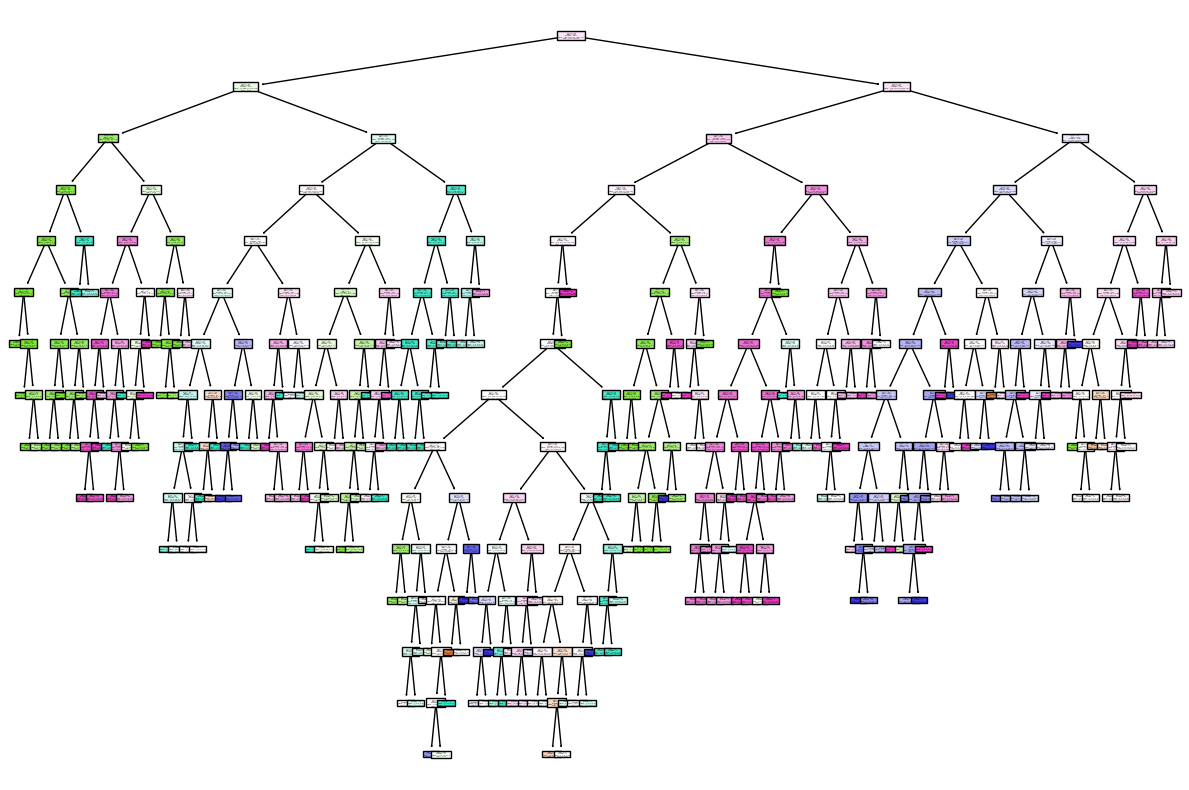

In [17]:
# plot de l'abre
plt.figure(figsize=(15,10))
plot_tree(model, class_names= data_target[0].unique(), filled=True)
plt.show()